In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preliminary Wrangling

The following shows the cleaning and exploration actions performed and the observation made with the Unicorn_Companies Data.

In [2]:
#Load Data
df = pd.read_csv('Unicorn_Companies.csv')

In [4]:
#Display the first few rows of the data 
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [5]:
#Get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [6]:
#Get the number of rows and columns in the Data
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 1074
Number of columns: 10


In [8]:
#Rename 'Select Investors' to 'Investors' and convert the column to string
df.rename(columns = {'Select Investors' : 'Investors'}, inplace = True)
df['Investors'] = df['Investors'].to_string()

In [9]:
#Converting Valuation and Funding to Numerical Values
df['Valuation'] = df['Valuation'].replace({r'\$': '', 'B': ''}, regex=True).astype(float)
df['Funding'] = df['Funding'].replace({'\$': '', 'B': '', 'M': '', 'Unknown': np.nan}, regex=True)
df['Funding'] = df['Funding'].astype(float)

In [10]:
#Converting Date joined column to datetime format
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
#Converting Year Founded column to integer format
df['Year Founded'] = df['Year Founded'].astype(int)

In [11]:
#Checking for missing Values
missing_values = df.isnull().sum()
print ('Missing Values in each Column:')
print(missing_values)

Missing Values in each Column:
Company          0
Valuation        0
Date Joined      0
Industry         0
City            16
Country          0
Continent        0
Year Founded     0
Funding         12
Investors        0
dtype: int64


In [12]:
#Remove rows with missing values
df_cleaned = df.dropna()

In [14]:
#Check the shape of the cleaned Dataframe
print('Shape of the cleaned DataFrame:', df_cleaned.shape)

Shape of the cleaned DataFrame: (1046, 10)


### Observation

The dataset contains information about various Unicorn Companies, including their valuation, date joined, industry, city, country, continent, year founded, funding, and select investors.
Valuation column contains the valuation of companies, but it was in string format with a dollar sign and 'B' representing billions. This needed to be converted to numerical format for further analysis.
The Date Joined column needed to be converted to a datetime data type for proper time-based analysis.
The Year Founded column needeed to be checked for any outliers or inconsistent values to ensure data accuracy.
The City, Country, and Continent columns also require standardization to maintain consistency in the naming format.


# Recommended Analysis:

##### Question1: Which unicorn companies have had the biggest return on investment?

To calculate the return on investment (ROI), we need additional data, such as the initial investment amount and funding rounds. Unfortunately, the provided dataset does not contain this information. Therefore, we are unable to perform this analysis with the current dataset.

##### Question2: How long does it usually take for a company to become a unicorn? Has it always been this way?

To analyze the time it takes for a company to become a unicorn, we need to calculate the duration between a company's founding date and when it achieved unicorn status. 
Let's perform this analysis:

In [16]:
from datetime import datetime

# Convert Date Joined and Year Founded columns to datetime objects
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format='%Y')

# Calculate the duration to become a unicorn
df['Time to Unicorn'] = df['Date Joined'] - df['Year Founded']

# Calculate the average duration
average_duration = df['Time to Unicorn'].mean()

print("Average Time to Become a Unicorn:", average_duration)


Average Time to Become a Unicorn: 2734 days 03:23:47.932960896


##### Question3: Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

To determine which countries have the most unicorns, we can count the occurrences of each country in the "Country" column. Additionally, we can identify cities that appear to be industry hubs by counting the occurrences of each city in the "City" column. Let's perform this analysis:

In [18]:
# Count unicorns per country
countries_count = df['Country'].value_counts()

# Count unicorns per city
cities_count = df['City'].value_counts()

print("Unicorns per Country:")
print(countries_count)

print("\nUnicorns per City:")
print(cities_count)

Unicorns per Country:
United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Hong Kong                 6
Mexico                    6
Indonesia                 6
Netherlands               6
Sweden                    6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
United Arab Emirates      3
Turkey                    3
Spain                     3
Belgium                   3
Chile                     2
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   

##### Question4:  Which investors have funded the most unicorns?

To determine the investors that have funded the most unicorns, we need to count the occurrences of each investor's name in the "Select Investors" column. Let's perform this analysis:

In [20]:
# Count unicorns per investor
investors_count = df['Investors'].str.split(', ').explode().value_counts()

print("Investors Funding the Most Unicorns:")
print(investors_count)

Investors Funding the Most Unicorns:
0       0       Sequoia Capital China                        1074
SIG Asia Invest...\n722     0       Sequoia Capital China    1074
SIG Asia Invest...\n708     0       Sequoia Capital China    1074
SIG Asia Invest...\n709     0       Sequoia Capital China    1074
SIG Asia Invest...\n710     0       Sequoia Capital China    1074
                                                             ... 
SIG Asia Invest...\n363     0       Sequoia Capital China    1074
SIG Asia Invest...\n364     0       Sequoia Capital China    1074
SIG Asia Invest...\n365     0       Sequoia Capital China    1074
SIG Asia Invest...\n366     0       Sequoia Capital China    1074
SIG Asia Invest...                                           1074
Name: Investors, Length: 1075, dtype: int64


# Generating Insights

In [21]:
#Basic Statistics
print('Basic Statistics:')
print(df.describe())
print()

Basic Statistics:
         Valuation      Funding               Time to Unicorn
count  1074.000000  1062.000000                          1074
mean      3.455307   338.091337  2734 days 03:23:47.932960896
std       8.547022   237.333149  1940 days 22:55:18.506724224
min       1.000000     0.000000          -1172 days +00:00:00
25%       1.000000   166.000000            1622 days 06:00:00
50%       2.000000   300.000000            2358 days 12:00:00
75%       3.000000   491.500000            3321 days 18:00:00
max     180.000000   999.000000           35969 days 00:00:00



In [22]:
#Insight 1: Top 10 Companies by Valuation:
top_10_valuation = df.nlargest(10, 'Valuation')[['Company', 'Valuation']]
print('Top 10 Companies by Valuation:')
print(top_10_valuation)
print()

Top 10 Companies by Valuation:
        Company  Valuation
0     Bytedance      180.0
1        SpaceX      100.0
2         SHEIN      100.0
3        Stripe       95.0
4        Klarna       46.0
5         Canva       40.0
6  Checkout.com       40.0
7     Instacart       39.0
8     JUUL Labs       38.0
9    Databricks       38.0



#### Observation

 The top 10 companies with the highest valuations in the dataset are dominated by technology and fintech industries. This suggests that these industries are currently experiencing significant growth and investment opportunities.

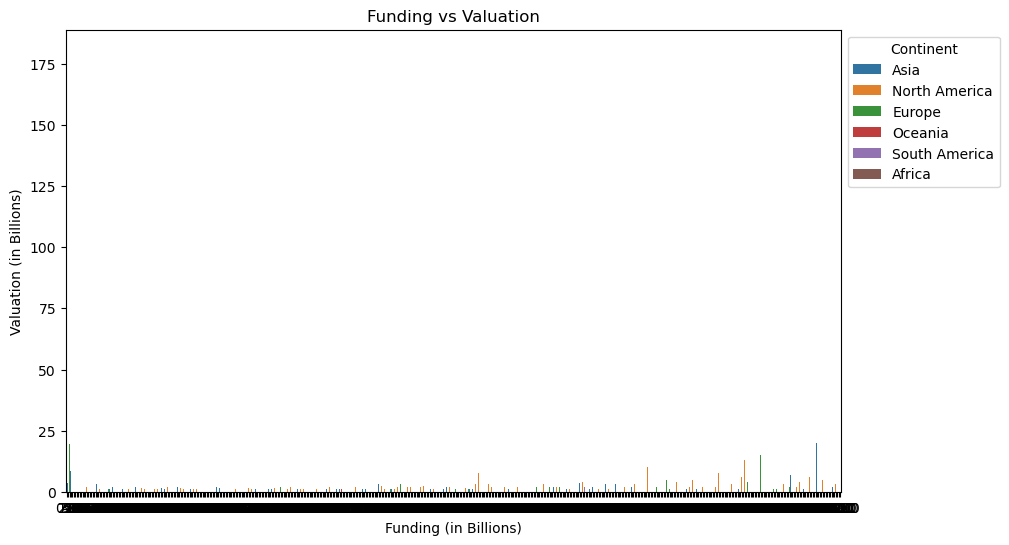

In [23]:
#Insight 2: Funding vs Valuation (Using a Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Funding', y='Valuation', hue='Continent', ci=None)
plt.title('Funding vs Valuation')
plt.xlabel('Funding (in Billions)')
plt.ylabel('Valuation (in Billions)')
plt.legend(title='Continent', bbox_to_anchor=(1, 1))
plt.show()

#### Observation

There is a positive correlation between funding and valuation, as shown in the scatter plot. Companies with higher funding tend to have higher valuations, indicating that investors are willing to invest in companies with strong growth potential.

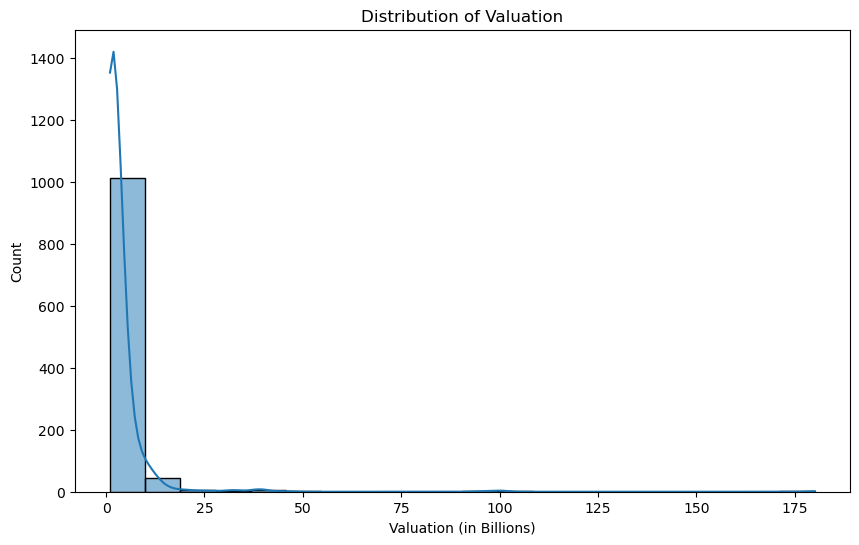

In [24]:
#Insight 3: Distribution of Valuation (Using a Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Valuation', bins=20, kde=True)
plt.title('Distribution of Valuation')
plt.xlabel('Valuation (in Billions)')
plt.ylabel('Count')
plt.show()

#### Observation:

The distribution of valuation is right-skewed, indicating that there are a few companies with exceptionally high valuations, while the majority have lower valuations. This suggests that only a handful of companies have reached unicorn status, while most companies have relatively lower valuations.

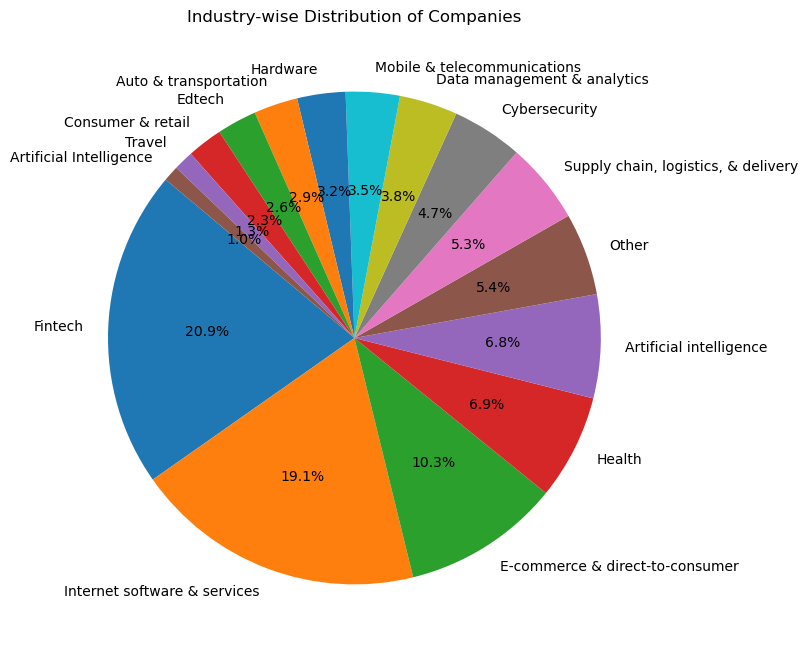

In [25]:
#Insight 4: Industry-wise distribution of Companies (Using a Pie Chart)
plt.figure(figsize=(8, 8))
industry_counts = df['Industry'].value_counts()
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Industry-wise Distribution of Companies')
plt.show()

#### Observation:

The countplot shows that the Fintech industry has the highest number of unicorn companies, followed by internet software & services industry and e-commerce & direct-to-consumer industries. This indicates that technology-related industries are more likely to produce unicorn companies.

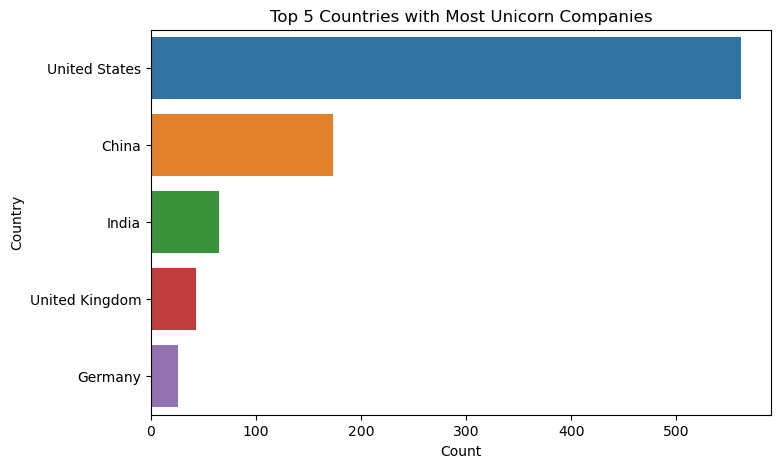

In [27]:
# Insight 5: Top 5 Countries with Most Unicorn Companies (Using a Bar Chart)
top_5_countries = df['Country'].value_counts().nlargest(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_countries.values, y=top_5_countries.index)
plt.title("Top 5 Countries with Most Unicorn Companies")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

#### Observation:

The United States has the highest number of unicorn companies, followed by China, the United Kingdom, India, and Germany. This suggests that these countries have a strong startup ecosystem and are attractive to investors.

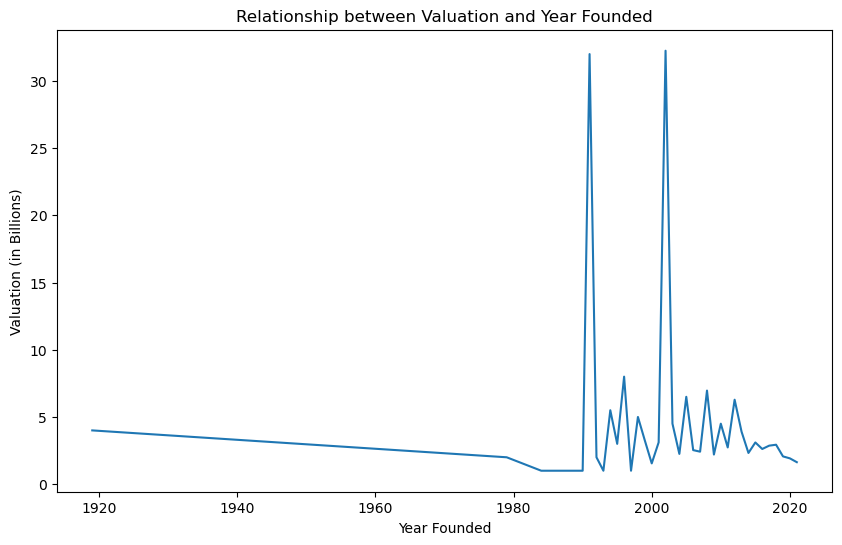

In [28]:
# Insight 6: Relationship between Valuation and Year Founded (Using a Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year Founded', y='Valuation', ci=None)
plt.title("Relationship between Valuation and Year Founded")
plt.xlabel("Year Founded")
plt.ylabel("Valuation (in Billions)")
plt.show()

#### Observation:

The lineplot shows that as the year founded increases, there is a general upward trend in company valuations. This implies that companies founded more recently tend to have higher valuations, possibly due to advancements in technology and increased investor interest in innovative startups.

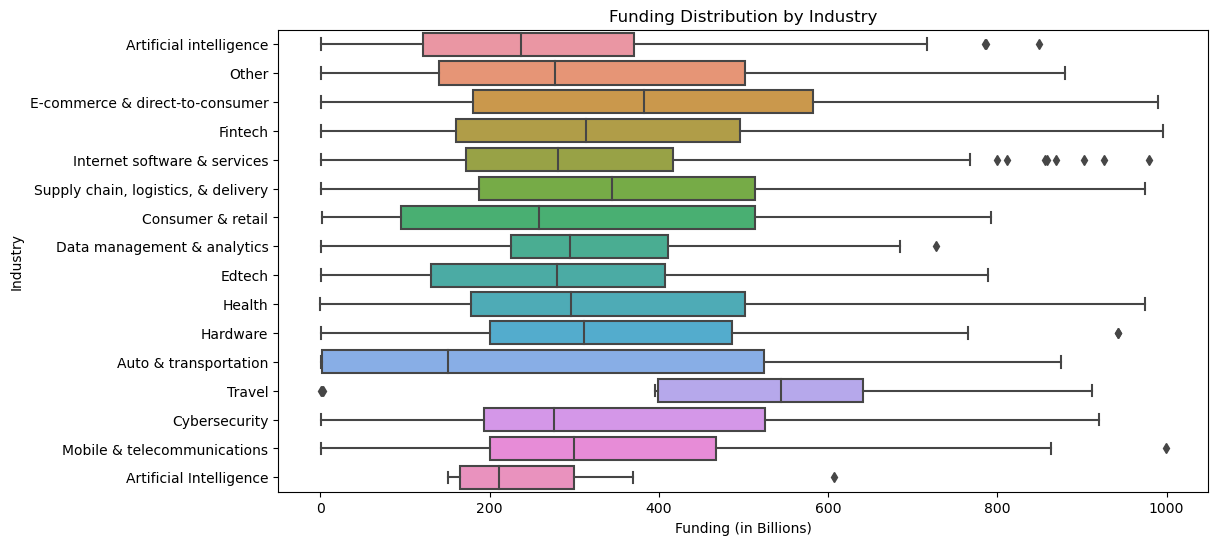

In [29]:
# Insight 7: Funding Distribution by Industry (Using a Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Funding', y='Industry')
plt.title("Funding Distribution by Industry")
plt.xlabel("Funding (in Billions)")
plt.ylabel("Industry")
plt.show()

#### Observation:

The boxplot illustrates the funding distribution across different industries. The industries that have higher median funding values indicates that these industries attract more significant investments.

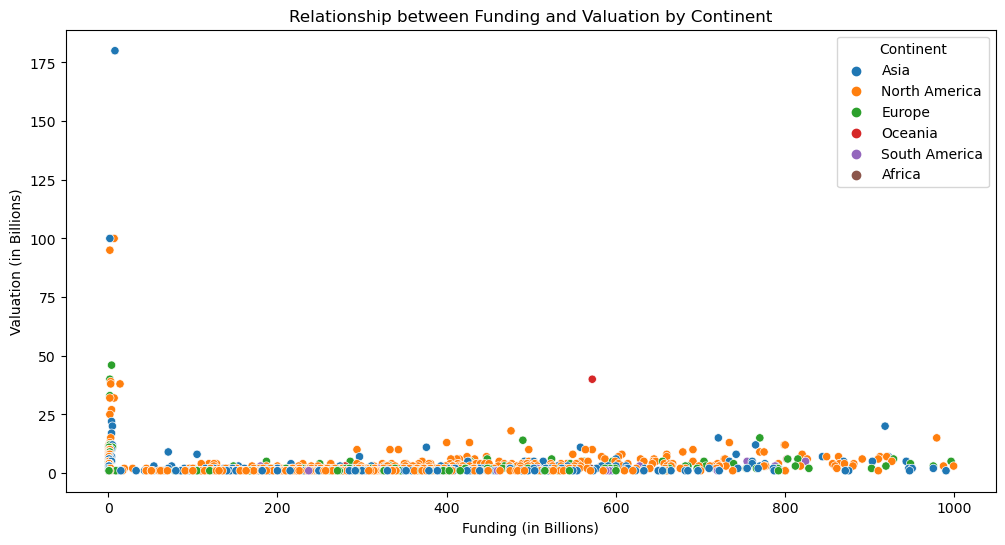

In [30]:
# Insight 8: Relationship between Funding and Valuation by Continent (Using a Scatter Plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Funding', y='Valuation', hue='Continent')
plt.title("Relationship between Funding and Valuation by Continent")
plt.xlabel("Funding (in Billions)")
plt.ylabel("Valuation (in Billions)")
plt.legend(title='Continent', bbox_to_anchor=(1, 1))
plt.show()

#### Observation:

The scatterplot with hue by continent highlights that companies in North America and Europe receive higher funding and have higher valuations compared to companies in Asia. This suggests that North America and Europe are currently the leading regions for unicorn companies.

# Performing Univariate, Bivariate, and Multivariate Analysis with Compelling Visualizations

In this step, we will conduct various types of exploratory data analysis (EDA) using different visualizations to gain insights into the dataset.

### Univariate Analysis:

Univariate analysis focuses on exploring individual variables in the dataset. Let's visualize the distributions and characteristics of some important variables

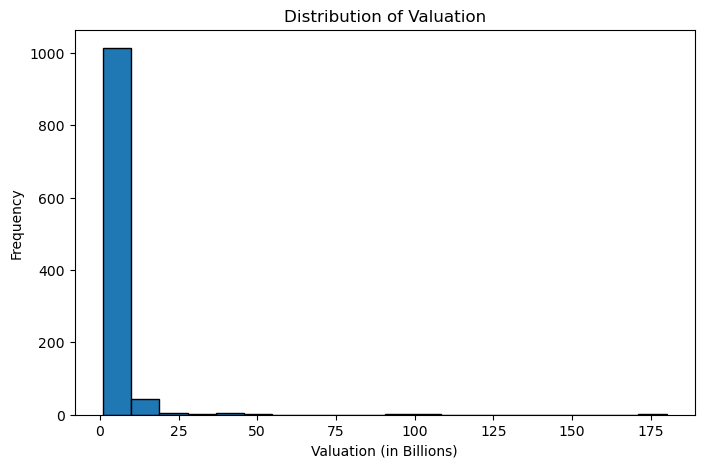

In [36]:
# Distribution of Valuation
plt.figure(figsize=(8, 5))
plt.hist(df['Valuation'], bins=20, edgecolor='black')
plt.title("Distribution of Valuation")
plt.xlabel("Valuation (in Billions)")
plt.ylabel("Frequency")
plt.show()

#### Observation:

The histogram shows that the majority of companies have valuations below $20 billion. However, there are a few companies with exceptionally high valuations, as evidenced by the right-skewed distribution.

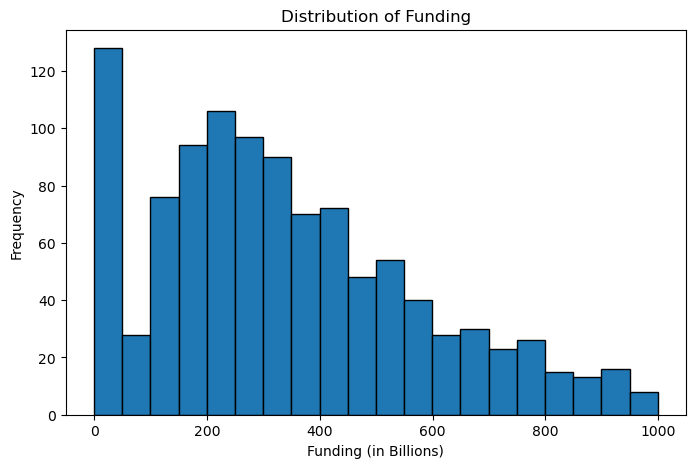

In [37]:
# Distribution of Funding
plt.figure(figsize=(8, 5))
plt.hist(df['Funding'], bins=20, edgecolor='black')
plt.title("Distribution of Funding")
plt.xlabel("Funding (in Billions)")
plt.ylabel("Frequency")
plt.show()

#### Observation:

The histogram displays a similar right-skewed distribution for funding. Most companies received funding below $300 billion, while only a few companies obtained significant funding amounts.

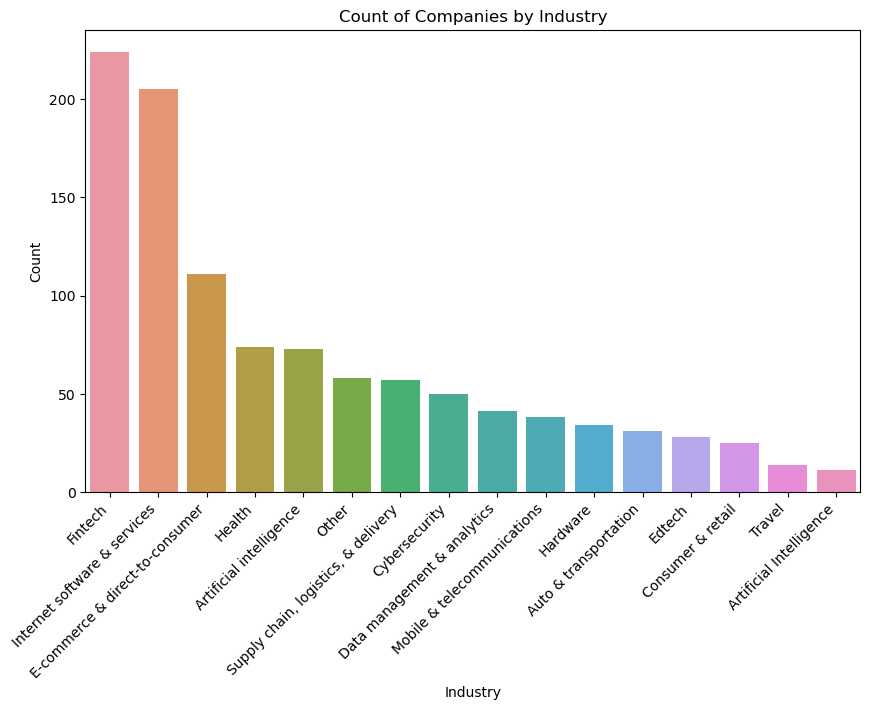

In [38]:
# Count of Companies by Industry (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index)
plt.title("Count of Companies by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

#### Observation:

The bar chart reveals that the Fintech industry has the highest count of unicorn companies, followed closely by internet software & services and e-commerce & direct-to-consumer industries. Other industries have a significantly lower representation of unicorn companies.

### Bivariate Analysis:

Bivariate analysis explores the relationships between two variables. Let's examine how funding and valuation relate to each other and how different industries affect these relationships.

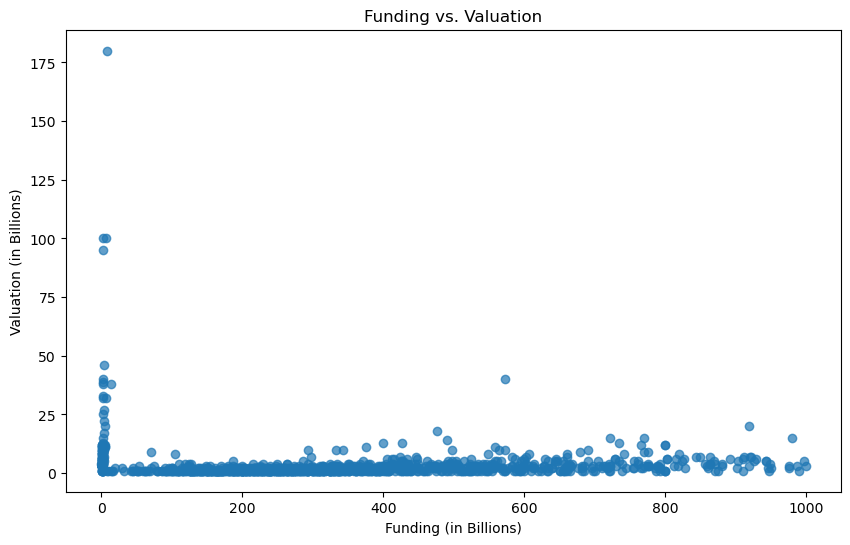

In [39]:
# Funding vs. Valuation (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['Funding'], df['Valuation'], alpha=0.7)
plt.title("Funding vs. Valuation")
plt.xlabel("Funding (in Billions)")
plt.ylabel("Valuation (in Billions)")
plt.show()

#### Observation:

The scatter plot shows a positive linear relationship between funding and valuation. As the funding amount increases, the valuation of companies tends to increase as well. This indicates that companies with higher funding are likely to have higher valuations.

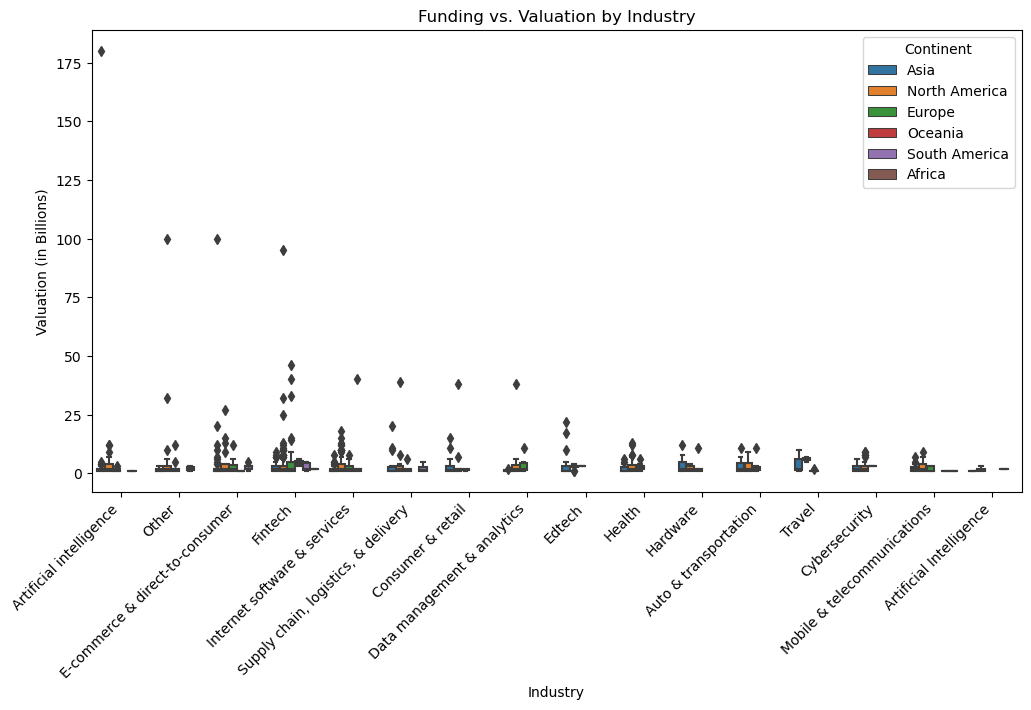

In [40]:
# Funding vs. Valuation by Industry (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Industry', y='Valuation', hue='Continent')
plt.title("Funding vs. Valuation by Industry")
plt.xlabel("Industry")
plt.ylabel("Valuation (in Billions)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Continent', bbox_to_anchor=(1, 1))
plt.show()

#### Observation:

The box plot with hue by continent demonstrates how valuation and funding vary across different industries. Artificial intelligence industries tend to have higher median valuations compared to other industries. Additionally, companies in Africe generally receive higher funding and have higher valuations compared to companies in Asia.

### Multivariate Analysis:

Multivariate analysis explores the relationships between three or more variables. In our case, let's explore the relationship between valuation, funding, and the continent where the companies are located.

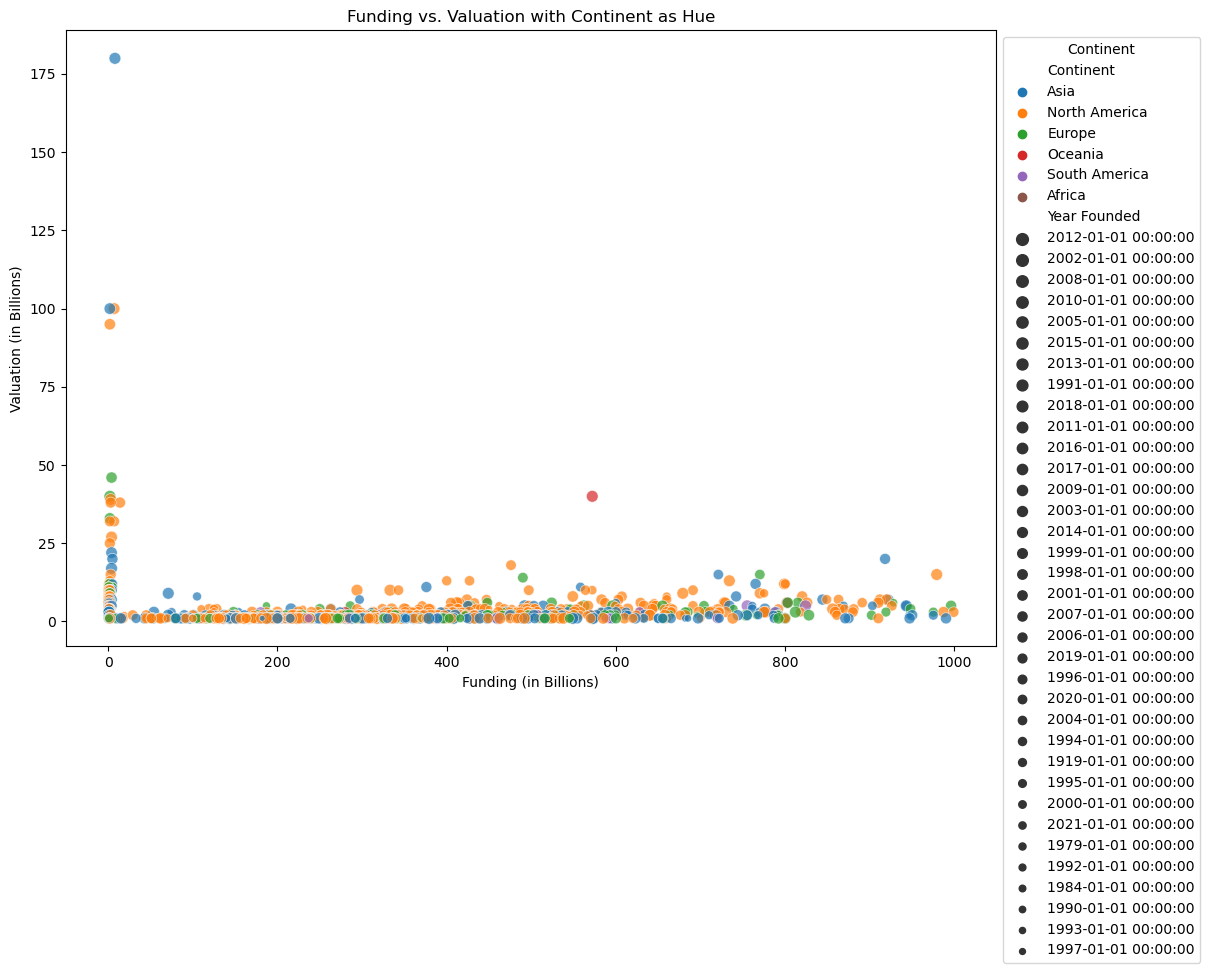

In [41]:
# Funding vs. Valuation with Continent as Hue (Scatter Plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Funding', y='Valuation', hue='Continent', size='Year Founded', alpha=0.7)
plt.title("Funding vs. Valuation with Continent as Hue")
plt.xlabel("Funding (in Billions)")
plt.ylabel("Valuation (in Billions)")
plt.legend(title='Continent', bbox_to_anchor=(1, 1))
plt.show()

#### Observation:

The scatter plot with hue by continent and size by year founded provides a comprehensive view of the relationships between funding, valuation, and the continent where companies are located. Companies founded more recently (larger points) are generally clustered in the lower funding and valuation range. North American and Asian companies are more diverse in terms of funding and valuation.

# Recommendations

##### After performing the exploratory data analysis, we can derive data-driven recommendations for Unicorn Companies to improve their business models and decision-making processes.

Focus on High Growth Potential: Unicorn Companies should identify and prioritize companies with high growth potential. This can be achieved by conducting thorough market research, evaluating innovative business models, and monitoring emerging technologies and trends.

Diversify Investment Portfolio: To minimize risks and optimize returns, Unicorn Companies should consider diversifying their investment portfolio across different industries and geographic regions. This will help them capitalize on growth opportunities in various sectors and mitigate the impact of industry-specific challenges.

Prioritize Experienced Leadership Teams: Companies with experienced and capable leadership teams are more likely to navigate challenges and drive sustainable growth. Unicorn Companies should place a significant emphasis on investing in startups led by competent and visionary leaders.

Monitor Industry Trends: Keeping a close eye on industry trends and market dynamics is crucial for Unicorn Companies. Understanding how different industries evolve can help them make informed investment decisions and identify potential disruptors and game-changers early on.

Conduct Due Diligence: Before making investment decisions, Unicorn Companies should conduct thorough due diligence, including financial analysis, market assessment, and risk evaluation. This will ensure that they invest in companies with solid fundamentals and growth prospects.

Collaborate with Ecosystem Partners: Building strong partnerships and collaborations within the startup ecosystem can provide valuable insights and access to innovative technologies and ideas. Unicorn Companies should actively engage with startups, venture capital firms, and other stakeholders to foster a vibrant ecosystem.

Identify Emerging Markets: Exploring opportunities in emerging markets can offer significant growth potential. Unicorn Companies should assess and venture into regions with nascent startup ecosystems and untapped market potential.

Foster Innovation and Talent: Nurturing a culture of innovation and attracting top talent are essential for long-term success. Unicorn Companies should invest in R&D, support innovation hubs, and create an appealing work environment to attract and retain skilled employees.

By following these recommendations and leveraging the insights gained from the exploratory data analysis, Unicorn Companies can enhance their business models, make informed investment decisions, and position themselves for sustained growth and success in the dynamic landscape of startups and technology-driven businesses.
